In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('./NLP')
sys.path.append('./RandomQueryGenerator')
import os
from TranslationToQueryGraph import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

## Play with the HumanMine model trained on 1000000 instances

Sentence (natural language query):
what is value, url, annotationversion, name from synonym, dataset, strain, probeset such that id lower than @value
['value', 'synonym']
2
['url', 'dataset']
2
['annotationversion', 'strain']
2
['name', 'strain']
2
['value', 'synonym']
2
['url', 'dataset']
2
['annotationversion', 'strain']
2
['id', 'strain', '<', '@value']
4
['name', 'strain']
2

Model predictions:
[{'raw': 'value synonym ; url dataset ; annotationversion strain ; name strain', 'attributes': ['value', 'url', 'annotationversion', 'name'], 'classes': ['synonym', 'dataset', 'strain', 'strain'], 'constraints': []}, {'raw': 'value synonym ; url dataset ; annotationversion strain ; id strain < @value ; name strain', 'attributes': ['value', 'url', 'annotationversion', 'name'], 'classes': ['synonym', 'dataset', 'strain', 'strain'], 'constraints': ['id strain < @value']}]


obtainQueryGraph
[{'raw': 'value synonym ; url dataset ; annotationversion strain ; name strain', 'attributes': ['value', 

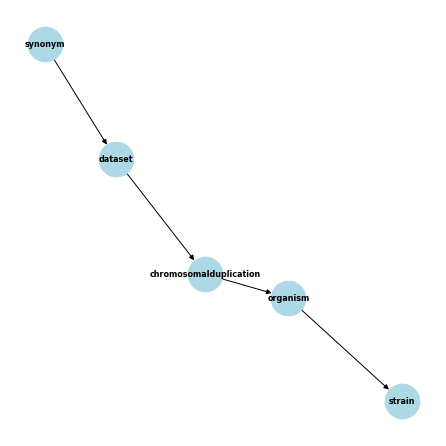

The English generated from the query graph is: what is value, url, name, annotationversion in synonym, dataset, chromosomalduplication, organism, strain

==========English from candidate Query Graph #2=============


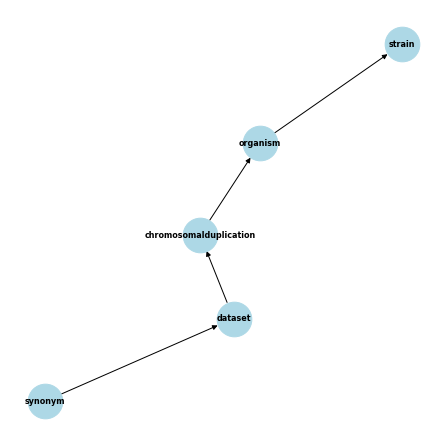

The English generated from the query graph is: give value, url, name, annotationversion in synonym, dataset, chromosomalduplication, organism, strain with id strain < @value


In [2]:
# Load the model
TranslationToQueryGraphObj = TranslationToQueryGraph(translationsOutputDir = "./NLP/Translations/", modelsDir = "./NLP/Models/", schemaDir="./Data/Schemas/HumanMinedbSchema.obj", model="HumanMine-1000000")

# Parameters for the translation
beam_size = 10 # Number of candidates considered in each branching of the beam search tree
candidates_considered = 2 # Number of candidate translations that will be finally obtained from the model (i.e. if it's 2, you will get 2 queries, if 3, 3 queries, and so on)

# Some example queries (from the test set). The last one is the one used, write your own if you want.
inputSentence = "what is value, url, annotationversion, name from synonym, dataset, strain, probeset such that id lower than @value"

print("Sentence (natural language query):\n" + inputSentence)

# 1. Obtain predictions from the model
modelPredictions = TranslationToQueryGraphObj.obtainSentenceModelPrediction(inputSentence, n_best=candidates_considered, beam_size=beam_size, modelCheckpoint='2000')

print("\nModel predictions:")
print(modelPredictions)
print("\n")

# 2. Obtain query graphs (number corresponds to n_best) from the model's predictions
queryGraphs = TranslationToQueryGraphObj.obtainQueryGraph(modelPredictions, debug=False)

# 3. Get the English back from each of the query graphs generated
for inx, queryGraph in enumerate(queryGraphs):
    if(isinstance(queryGraph, str)):
        continue
    print("\n==========English from candidate Query Graph #" + str(inx+1) + "=============")
    englishFromQueryGraph = TranslationToQueryGraphObj.getEnglishFromQueryGraph(queryGraph, showGraph=True) # To show the query graph too
